# Pneumonia Detection From Chest X-Ray Images

### Group Members

#### Okan ALAN : 21526638
#### Batuhan METE : 21627538

Abstract of the project comes here.




LA şu validation için trainden parça çıkart. deki validation ile overfitting i anlıyoruz.

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

When we learned that the project theme is health, we couldn't choice the project topic. Then the COVID-19 virus situation evolved. We tought we can use covid-19 data into our project because it is a viral topic but we hearded some groups already sent their project ideas to you. When we research a dataset for COVID-19 we learned symptoms of pneumonia is same. After that, we changed the our topic. We select the pneumonia problem.

#### What is the Pneumonia?

Pneumonia is a lung infection that can range from mild to so severe that you have to go to the hospital. It happens when an infection causes the air sacs in your lungs (your doctor will call them alveoli) to fill with fluid or pus. That can make it hard for you to breathe in enough oxygen to reach your bloodstream. Anyone can get this lung infection. But infants younger than age 2 and people over age 65 are at higher risk. That’s because their immune systems might not be strong enough to fight it. Causes include bacteria, viruses, and fungi.  If your pneumonia results from bacteria or a virus, you can spread it to someone else. Lifestyle habits, like smoking cigarettes and drinking too much alcohol, can also raise your chances of getting pneumonia.

#### Symptoms of Pneumonia

Symptoms can vary depending on what’s causing pneumonia, age, and overall health. They usually develop over several days.

**Common pneumonia symptoms include:**

- Chest pain when you breathe or cough
- Cough that produces phlegm or mucus
- Fatigue and loss of appetite
- Fever, sweating, and chills
- Nausea, vomiting, and diarrhea
- Shortness of breath

Along with these symptoms, older adults and people with weak immune systems might be confused or have changes in mental awareness, or they might have a lower-than-usual body temperature. Newborns and infants may not show any signs of infection. Or they might vomit, have a fever and a cough, and seem restless or tired.

**Attention Please** If you have a new cough, fever, or shortness of breath, call your doctor to ask about whether it could be COVID-19. Illness with the new coronavirus can also lead to pneumonia.

Pneumonia is typically diagnosed based on a combination of physical signs and a chest X-ray. In adults with normal vital signs and a normal lung examination, the diagnosis is unlikely. However, the underlying cause can be difficult to confirm, as there is no definitive test able to distinguish between bacterial and non-bacterial origin. The overall impression of a physician appears to be at least as good as decision rules for making or excluding the diagnosis.

A chest radiograph is frequently used in diagnosis. In people with mild disease, imaging is needed only in those with potential complications, those not having improved with treatment or those in which the cause is uncertain. If a person is sufficiently sick to require hospitalization, a chest radiograph is recommended. Findings do not always match the severity of disease and do not reliably separate between bacterial infection and viral infection.


We had two different types of datasets for this topic. The first one was consisting of yes/no answers to the above symptoms. Another one was the Chest X-Ray images. Instead of using the first way, we decided to use a labeled dataset that contains X-Ray images.

## Data Understanding<a class="anchor" id="data_understanding"></a>

Our dataset is Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification. There are 3 verisions. We used version 2. This dataset is prepared by Universtiy of UC San Diego.

**Description**

Dataset of validated OCT and Chest X-Ray images described and analyzed in "Deep learning-based classification and referral of treatable human diseases". The OCT Images are split into a training set and a testing set of independent patients. OCT Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN, and NORMAL. We used only X-Ray Images.

**Content**

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,856 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

|            | Normal Count | Pneumonia Count | Total |
|------------|--------------|-----------------|-------|
| Train      | 1349         | 3883            | 5232  |
| Test       | 234          | 390             | 624   |
| Total      | 1583         | 4273            | 5856  |

## Data Preparation<a class="anchor" id="data_preparation"></a>

We used 3 different machine learning model in the project. These are K-Nearest-Neighbours(KNN), Convolutional Neural Network(CNN) that is created by us by trial and error and VGG16 that is wellknown CNN architecture wihich was used to win ImageNet competition in 2014. You can say there is 2 main model but we will explain why we said 3 in next section. We split our data set to train and test it before coding because we thought and researched which of the following ways was correct for comparable results.

- Splitting dataset before do anything
- Splitting dataset randomly for each model started

We know the second option is not stable because trained images change for each running but we used 3 different model and we need to compare in a healthy way. Taking reliable result we selected the first way. Each model are trained with same images and each one test their self same test images. We can analyze them more suitable.


The dataset consist of almost six thousands of images. Pre-processing methods that can be applied to images are less than a numerical dataset. We have a few options for pre-processing on images. Those are rotation, shifting, shearing, zooming, rescaling, brightness for each image. We used them separately or a combination of some. Unfortunately, these changes did not raise our prediction results. some combinations decreased accuracy of our results almost half, remaining combinations approached the highest score of the relevant model but never passed. Let's look at which pre-processing how affected our accuracy result.

- **Horizontal Flipping:** It did not significantly affect the score. 
- **Vertical Flipping:** It negatively affects the score. The score decreased by almost %10.
- **Zooming:** After 20% zooming, occurring a significant drop in score 
- **Shifting:** It has 2 options such as right-left and up-down directions. There is no important effect on result
- **Rotation:** After 15% rotation, occurring a significant drop in score
- **Brightness:** The result gets worse if it is increased too much otherwise it doesn't affect so much. When the brightness was increased, the prediction as pneumonia was increased. When the brightness was increased, darkens are decreasing. About our problem, darkens are important for a healthy lung. The more prominent the lung, the higher you are healthy. That's why the result got worse. 
- **Rescaling:** It increased the training speed :). We used only this with a 1/255 scaling parameter for each model.
- **ZCA Whitening** It's effect not understood

These pre-processes only increased our training time. Therefore we didn't use any pre-processing.

## Modeling<a class="anchor" id="modeling"></a>

Which model will be used? Why? What parameters?

## VGG 16

We used VGG-16 in one of our implementations. VGG-16 is a CNN architecture that used to win an image processing competition in 2014. This architecture is considered one of the best image processing architecture in the time.

The input is fixed and it is in 224 x 224 RGB image format. Then the image passes a stack of convolutional layers, where the filters were used with a 3x3 receptive field. This is the smallest size to capture vertical, horizontal and center.

Three FC layers follow a stack of convolutional layers. The first two have 4096 channels each, the third performs 100-way ILSVRC classification and contains one for each class total of 1000. The final layer is the soft-max later. The configuration of the connected layers is the same in all networks.

All hidden layers are equipped with ReLU non-linearly.
The major drawback of this architecture that, it takes a long time to train the data and the big size of the network.
We can see the visual representation of the architecture down below.

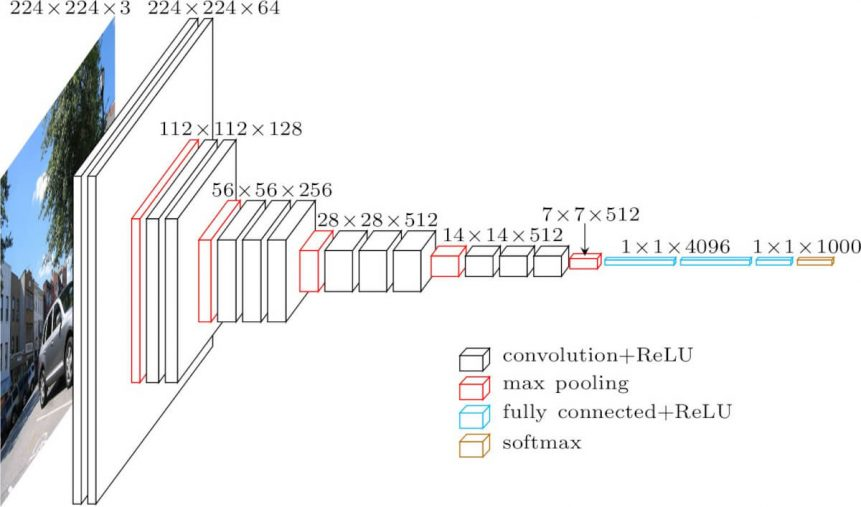

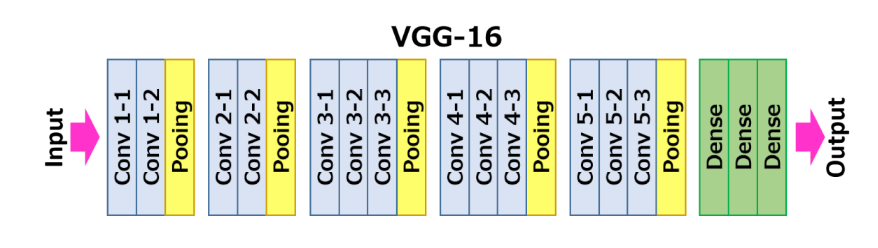

## Batu VGG-16 ile ilgili resimler bilgiler yaıcak buraya

## Evaluation<a class="anchor" id="evaluation"></a>

**VGG 16**

There were not so many options to change in this architecture. We played along with the different image sizes and epoch numbers. Since this method takes so much time to train the model, we had to use small image size for the reasonable results. (With full image size, the single epoch train time exceeded 1 hour in our workstations)

**Image Size 128 x 128**

We used 128 x 128 images with 15 epochs.It took around 400 minutes to train. In the pre proccessing step, we changed those fields down below.
- rotation_range=10,
- zoom_range = 0.1, 
- width_shift_range=0.2,  
- height_shift_range=0.2,
- horizontal_flip

Epoch 1/15
40/40 [==============================] - 1589s 40s/step - loss: 0.5162 - accuracy: 0.7611 - val_loss: 0.6815 - val_accuracy: 0.4231
Epoch 2/15
40/40 [==============================] - 1698s 42s/step - loss: 0.3900 - accuracy: 0.8530 - val_loss: 0.6452 - val_accuracy: 0.7628
Epoch 3/15
40/40 [==============================] - 1566s 39s/step - loss: 0.3277 - accuracy: 0.8827 - val_loss: 0.4752 - val_accuracy: 0.8221
Epoch 4/15
40/40 [==============================] - 1537s 38s/step - loss: 0.2557 - accuracy: 0.9106 - val_loss: 9.7853 - val_accuracy: 0.3750
Epoch 5/15
40/40 [==============================] - 1556s 39s/step - loss: 0.2320 - accuracy: 0.9208 - val_loss: 0.4832 - val_accuracy: 0.8157
Epoch 6/15
40/40 [==============================] - 1553s 39s/step - loss: 0.2108 - accuracy: 0.9273 - val_loss: 0.9675 - val_accuracy: 0.6058
Epoch 7/15
40/40 [==============================] - 1592s 40s/step - loss: 0.2027 - accuracy: 0.9307 - val_loss: 0.4218 - val_accuracy: 0.8686
Epoch 8/15
40/40 [==============================] - 1624s 41s/step - loss: 0.1872 - accuracy: 0.9330 - val_loss: 1.1925 - val_accuracy: 0.6250
Epoch 9/15
40/40 [==============================] - 1678s 42s/step - loss: 0.1743 - accuracy: 0.9350 - val_loss: 0.7113 - val_accuracy: 0.6875
Epoch 10/15
40/40 [==============================] - 1631s 41s/step - loss: 0.1958 - accuracy: 0.9294 - val_loss: 1.4019 - val_accuracy: 0.6250
Epoch 11/15
40/40 [==============================] - 1639s 41s/step - loss: 0.1730 - accuracy: 0.9391 - val_loss: 0.4466 - val_accuracy: 0.8173
Epoch 12/15
40/40 [==============================] - 1672s 42s/step - loss: 0.1593 - accuracy: 0.9438 - val_loss: 1.0659 - val_accuracy: 0.6298
Epoch 13/15
40/40 [==============================] - 1653s 41s/step - loss: 0.1536 - accuracy: 0.9436 - val_loss: 1.3625 - val_accuracy: 0.6266
Epoch 14/15
40/40 [==============================] - 1715s 43s/step - loss: 0.1371 - accuracy: 0.9490 - val_loss: 3.2662 - val_accuracy: 0.4247
Epoch 15/15
40/40 [==============================] - 1638s 41s/step - loss: 0.1431 - accuracy: 0.9488 - val_loss: 0.3763 - val_accuracy: 0.8766

As result, we got 94.88% on train and 87% on test data. The test data accuracy was not stable between epochs.

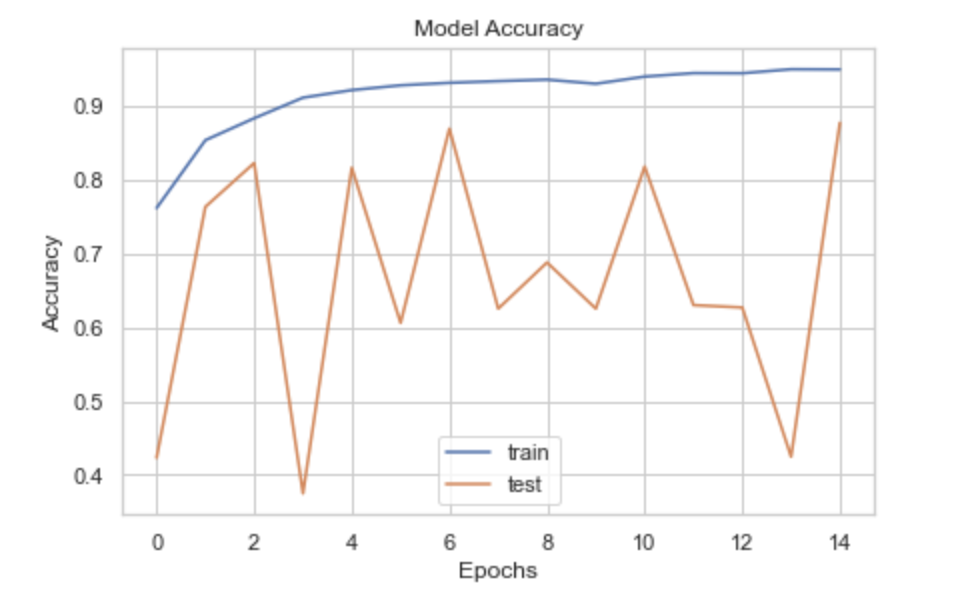

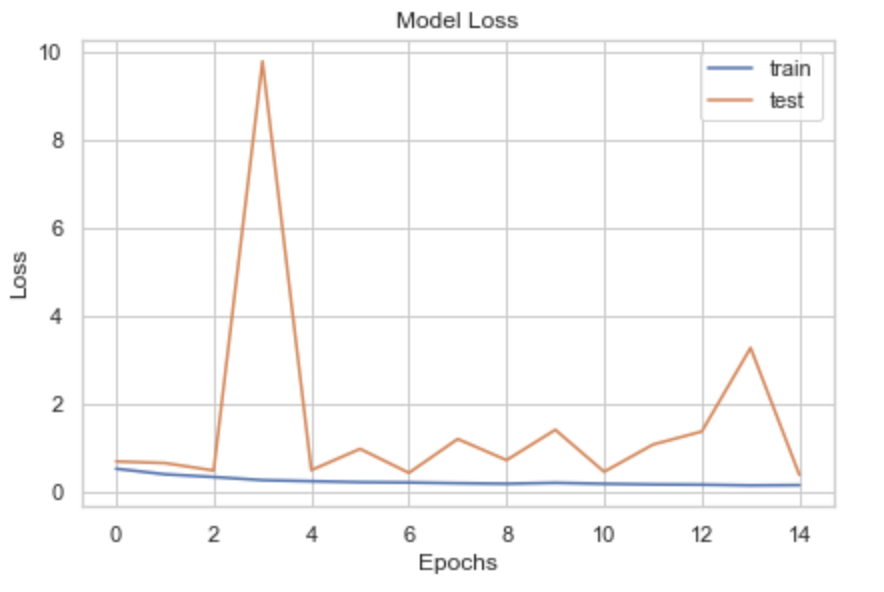

**Image Size 64 x 64**

Epoch 1/15
40/40 [==============================] - 453s 11s/step - loss: 0.5236 - accuracy: 0.7482 - val_loss: 0.7251 - val_accuracy: 0.3750
Epoch 2/15
40/40 [==============================] - 518s 13s/step - loss: 0.3812 - accuracy: 0.8520 - val_loss: 0.6242 - val_accuracy: 0.8526
Epoch 3/15
40/40 [==============================] - 528s 13s/step - loss: 0.3221 - accuracy: 0.8843 - val_loss: 0.4823 - val_accuracy: 0.8622
Epoch 4/15
40/40 [==============================] - 445s 11s/step - loss: 0.2487 - accuracy: 0.9184 - val_loss: 0.5364 - val_accuracy: 0.8013
Epoch 5/15
40/40 [==============================] - 418s 10s/step - loss: 0.1994 - accuracy: 0.9316 - val_loss: 0.5670 - val_accuracy: 0.6635
Epoch 6/15
40/40 [==============================] - 424s 11s/step - loss: 0.1880 - accuracy: 0.9347 - val_loss: 0.9228 - val_accuracy: 0.6362
Epoch 7/15
40/40 [==============================] - 573s 14s/step - loss: 0.1609 - accuracy: 0.9457 - val_loss: 1.9906 - val_accuracy: 0.5176
Epoch 8/15
40/40 [==============================] - 470s 12s/step - loss: 0.1639 - accuracy: 0.9417 - val_loss: 0.4072 - val_accuracy: 0.8045
Epoch 9/15
40/40 [==============================] - 573s 14s/step - loss: 0.1397 - accuracy: 0.9500 - val_loss: 0.6621 - val_accuracy: 0.6891
Epoch 10/15
40/40 [==============================] - 550s 14s/step - loss: 0.1462 - accuracy: 0.9509 - val_loss: 1.9999 - val_accuracy: 0.6843
Epoch 11/15
40/40 [==============================] - 593s 15s/step - loss: 0.1428 - accuracy: 0.9490 - val_loss: 0.3263 - val_accuracy: 0.8926
Epoch 12/15
40/40 [==============================] - 547s 14s/step - loss: 0.1176 - accuracy: 0.9581 - val_loss: 0.2800 - val_accuracy: 0.8894
Epoch 13/15
40/40 [==============================] - 532s 13s/step - loss: 0.1175 - accuracy: 0.9575 - val_loss: 0.6458 - val_accuracy: 0.6731
Epoch 14/15
40/40 [==============================] - 689s 17s/step - loss: 0.1154 - accuracy: 0.9580 - val_loss: 1.2735 - val_accuracy: 0.6250
Epoch 15/15
40/40 [==============================] - 581s 15s/step - loss: 0.1201 - accuracy: 0.9589 - val_loss: 0.9669 - val_accuracy: 0.7676

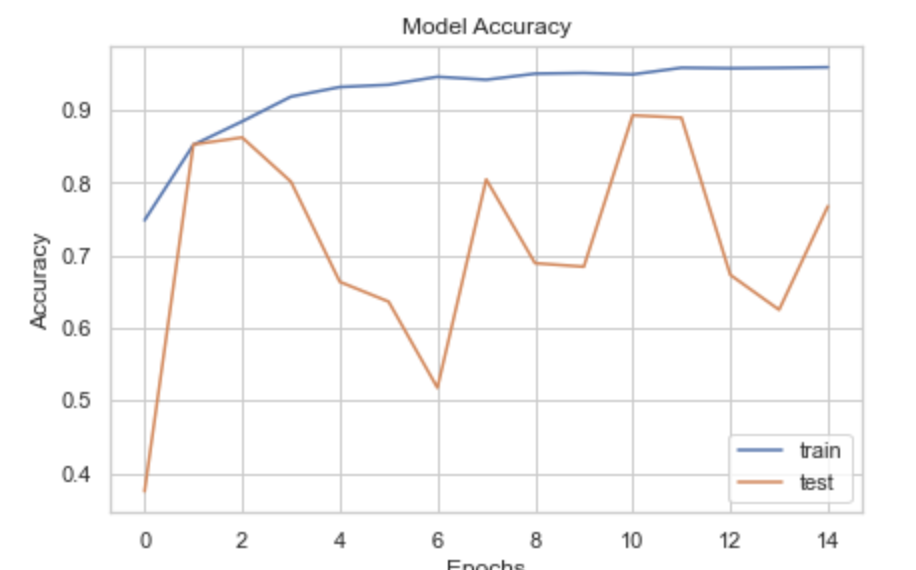

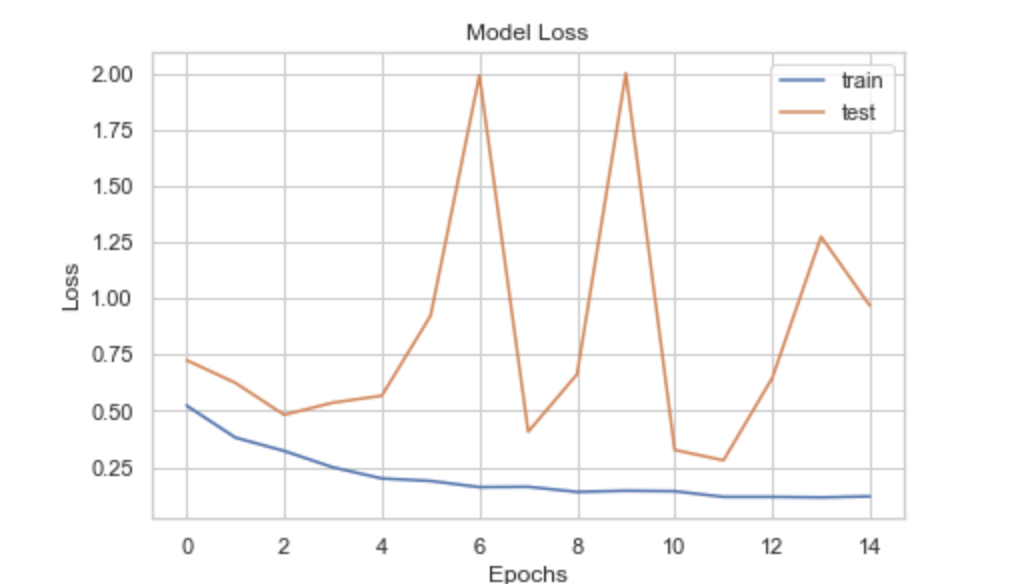

**without rotatıon stuff**

Epoch 1/15
40/40 [==============================] - 484s 12s/step - loss: 0.5268 - accuracy: 0.7496 - val_loss: 0.7178 - val_accuracy: 0.3750
Epoch 2/15
40/40 [==============================] - 525s 13s/step - loss: 0.3837 - accuracy: 0.8465 - val_loss: 0.9025 - val_accuracy: 0.3750
Epoch 3/15
40/40 [==============================] - 598s 15s/step - loss: 0.3395 - accuracy: 0.8776 - val_loss: 0.6284 - val_accuracy: 0.6250
Epoch 4/15
40/40 [==============================] - 564s 14s/step - loss: 0.2537 - accuracy: 0.9141 - val_loss: 0.4875 - val_accuracy: 0.8846
Epoch 5/15
40/40 [==============================] - 503s 13s/step - loss: 0.2069 - accuracy: 0.9269 - val_loss: 14.7144 - val_accuracy: 0.3750
Epoch 6/15
40/40 [==============================] - 509s 13s/step - loss: 0.2133 - accuracy: 0.9255 - val_loss: 0.6028 - val_accuracy: 0.7708
Epoch 7/15
40/40 [==============================] - 699s 17s/step - loss: 0.1790 - accuracy: 0.9408 - val_loss: 0.4227 - val_accuracy: 0.8462
Epoch 8/15
40/40 [==============================] - 467s 12s/step - loss: 0.1432 - accuracy: 0.9513 - val_loss: 0.3919 - val_accuracy: 0.8269
Epoch 9/15
40/40 [==============================] - 462s 12s/step - loss: 0.1524 - accuracy: 0.9443 - val_loss: 0.5235 - val_accuracy: 0.7083
Epoch 10/15
40/40 [==============================] - 624s 16s/step - loss: 0.1570 - accuracy: 0.9476 - val_loss: 0.3412 - val_accuracy: 0.8397
Epoch 11/15
40/40 [==============================] - 465s 12s/step - loss: 0.1370 - accuracy: 0.9504 - val_loss: 0.9662 - val_accuracy: 0.6619
Epoch 12/15
40/40 [==============================] - 436s 11s/step - loss: 0.1221 - accuracy: 0.9572 - val_loss: 0.3736 - val_accuracy: 0.8654
Epoch 13/15
40/40 [==============================] - 400s 10s/step - loss: 0.1138 - accuracy: 0.9600 - val_loss: 0.7482 - val_accuracy: 0.6795
Epoch 14/15
40/40 [==============================] - 400s 10s/step - loss: 0.1168 - accuracy: 0.9588 - val_loss: 0.4330 - val_accuracy: 0.7676
Epoch 15/15
40/40 [==============================] - 385s 10s/step - loss: 0.1137 - accuracy: 0.9583 - val_loss: 2.8147 - val_accuracy: 0.6859

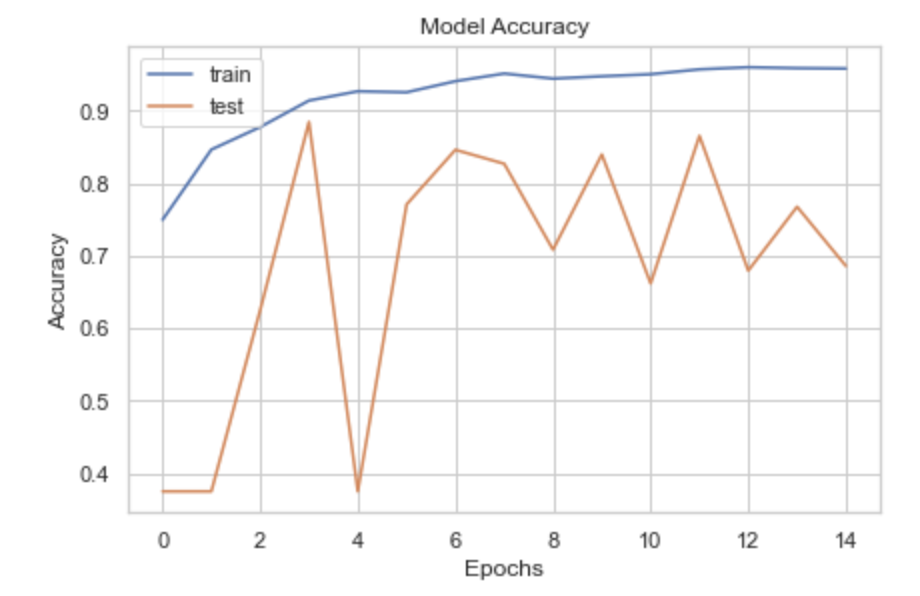

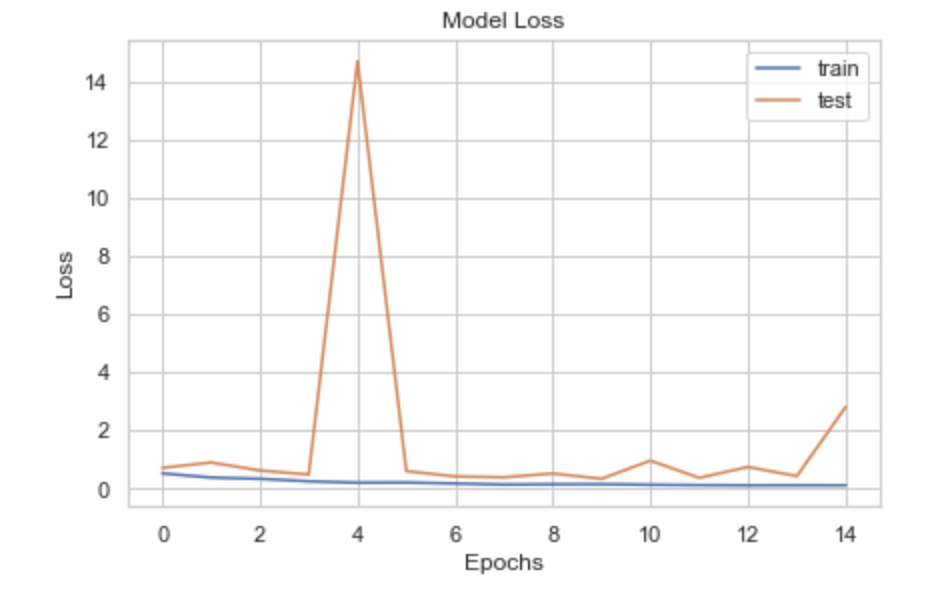

Evaluate your model. Provide results, tables, charts, etc.

## References<a class="anchor" id="references"></a>

https://www.webmd.com/lung/understanding-pneumonia-basics#1 => What is the Pneumonia?
https://en.wikipedia.org/wiki/Pneumonia => same above
https://www.who.int/news-room/fact-sheets/detail/pneumonia => same above

https://data.mendeley.com/datasets/rscbjbr9sj/2 => dataset
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia => kaggle competition that used the same dataset

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53 https://machinelearnings.co/this-is-part-3-in-a-series-of-posts-on-artificial-intelligence-and-deep-learning-neural-networks-702bbb335605 https://www.machinecurve.com/index.php/2018/12/07/convolutional-neural-networks-and-their-components-for-computer-vision/# => these 3 for CNN concept

https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0 => intermediate layer output

https://keras.io/api/preprocessing/image/ => preprocess image

https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c => VGG16

List all the sources you used during your work.
This includes jupyter notebooks you found on Internet.
Remeber, your work may not be an original one. However, this document must be genuine. Copy and paste kind of deliveries will be punished badly.


**Disclaimer!** <font color='grey'>This notebook was prepared by <student name(s)> as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>